<a href="https://colab.research.google.com/github/SamDewriter/week7-CausalGraph/blob/main/CausalNex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install dowhy

     |████████████████████████████████| 123 kB 4.2 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter

In [2]:
df = pd.read_csv('data.csv')

In [3]:
causal_df = df.drop(['id', 'Unnamed: 32'], axis=1).copy()

In [4]:
d = {'B':0, 'M':1}
causal_df['diagnosis'] = causal_df['diagnosis'].map(d)

In [5]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(causal_df, random_state=20, test_size=.2)

In [6]:
!pip install causalnex

  Using cached causalnex-0.10.0-py3-none-any.whl (140 kB)
     |████████████████████████████████| 1.9 MB 4.2 MB/s 
  Using cached wrapt-1.11.2-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 11.3 MB 49.7 MB/s 
     |████████████████████████████████| 831.4 MB 2.6 kB/s 
  Using cached scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)
  Using cached pgmpy-0.1.15-py3-none-any.whl (1.9 MB)
     |████████████████████████████████| 15.7 MB 174 kB/s 
     |████████████████████████████████| 25.9 MB 913 bytes/s 
  Using cached pathos-0.2.8-py2.py3-none-any.whl (81 kB)
     |████████████████████████████████| 247 kB 56.6 MB/s 
     |████████████████████████████████| 510 kB 46.1 MB/s 
  Using cached ppft-1.6.6.4-py3-none-any.whl (65 kB)
     |████████████████████████████████| 112 kB 54.1 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
  Using cached pox-0.3.0-py2.py3-none-any.whl (30 kB)
     |████████████████████████████████| 303 kB 53.1 MB/s 
     

In [6]:
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
sm = from_pandas(train_df)

/usr/local/lib/python3.7/site-packages/causalnex/structure/notears.py:411: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2


In [18]:
!pip install -q condacolab

In [19]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:34
🔁 Restarting kernel...


In [1]:
!conda install pygraphviz

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pygraphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.36.0             |       h3371d22_4         560 KB  conda-forge
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    cairo-1.16.0               |    h6cf1ce9_1008         1.5 MB  conda-forge
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    conda-4.10.3               |   py37h89c1867_0         3.1 MB  conda-forge
    expat-2.4.1                |       h9c3ff4c_0         182 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    fo

In [9]:
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)

/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


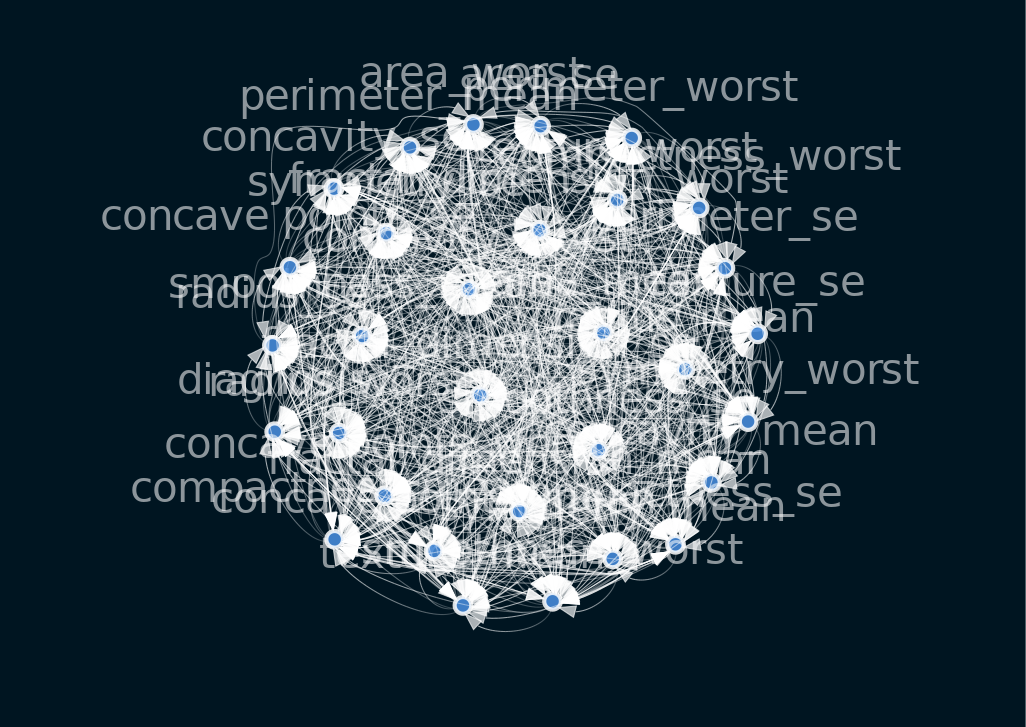

In [12]:
Image(viz.draw(format='png'))

In [11]:
from IPython.display import Image

/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


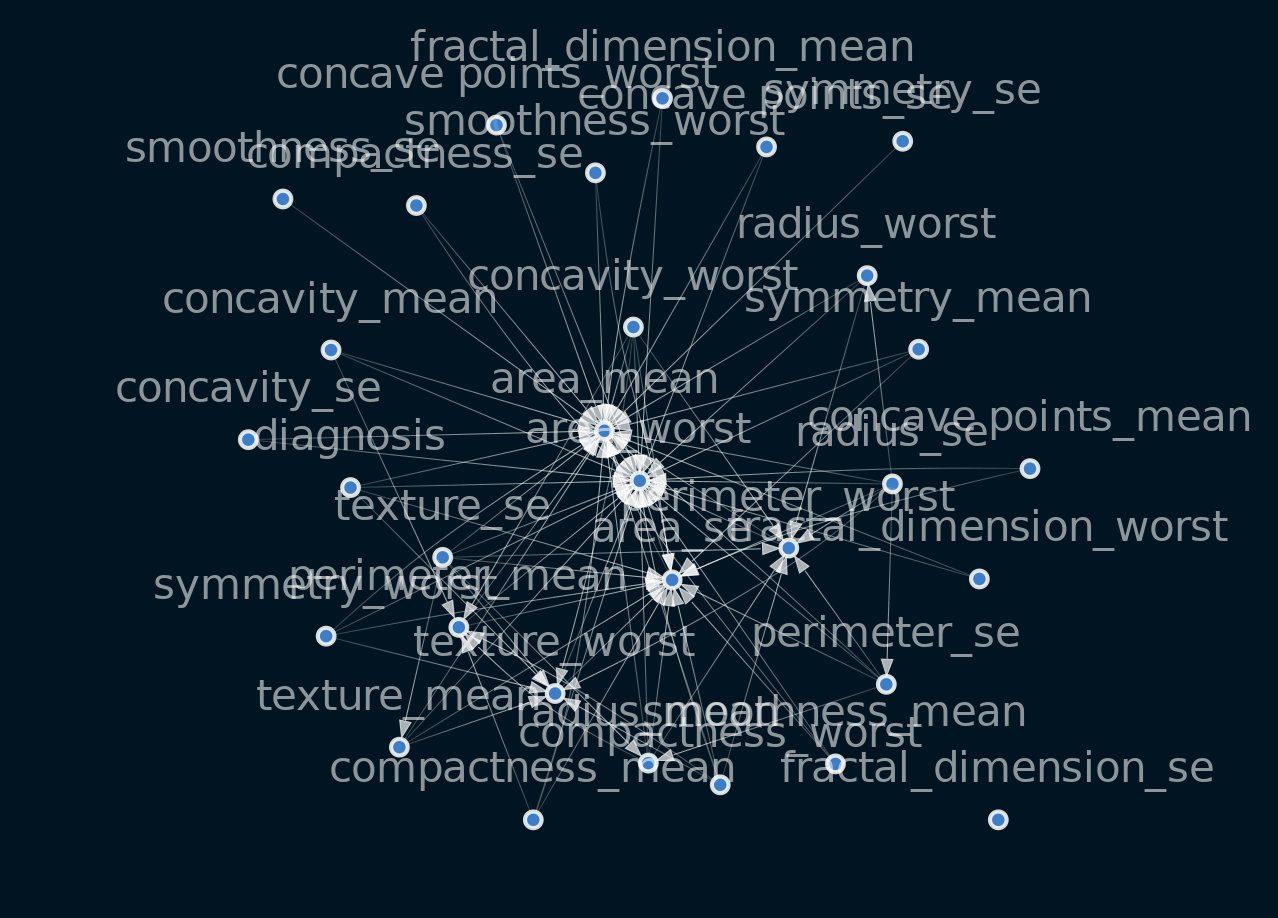

In [13]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))